In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('train.csv')
pd.set_option("display.max_columns", None)
df

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,Y,8,NaN,NaN,0,6,N,0,4,191642.0,209,38222,N,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,Y,8,NaN,NaN,0,6,N,0,13,102338.0,192,90135,N,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,Y,8,NaN,NaN,0,6,N,0,29,234618.0,373,79246,N,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,Y,2,NaN,NaN,0,6,N,0,24,215218.0,373,79246,N,5817,102,0,338215


In [3]:
df.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


In [4]:
df.dtypes

acqic          int64
bacno          int64
cano           int64
conam        float64
contp          int64
csmcu          int64
ecfg          object
etymd          int64
flbmk         object
flg_3dsmk     object
fraud_ind      int64
hcefg          int64
insfg         object
iterm          int64
locdt          int64
loctm        float64
mcc            int64
mchno          int64
ovrlt         object
scity          int64
stocn          int64
stscd          int64
txkey          int64
dtype: object

In [5]:
# 盜刷只佔了資料的 1%

df['fraud_ind'].value_counts(normalize=True)

0    0.986624
1    0.013376
Name: fraud_ind, dtype: float64

<AxesSubplot:xlabel='fraud_ind', ylabel='count'>

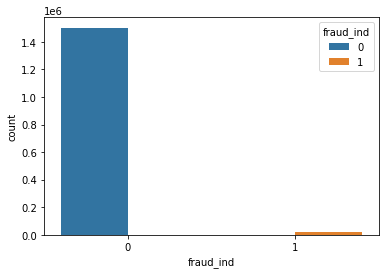

In [6]:
sns.countplot(x='fraud_ind',hue='fraud_ind',data=df)

In [7]:
# 僅有兩個特徵有缺失
df.isnull().sum()

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

In [8]:
df_1 = df.replace({'Y':1,'N':0})
df_1

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0.0,0.0,0,5,0,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,0,0,0,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0.0,0.0,0,5,0,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,0,5,0,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0.0,0.0,0,5,0,0,6,182129.0,263,93775,0,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,1,8,NaN,NaN,0,6,0,0,4,191642.0,209,38222,0,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,1,8,NaN,NaN,0,6,0,0,13,102338.0,192,90135,0,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,1,8,NaN,NaN,0,6,0,0,29,234618.0,373,79246,0,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,1,2,NaN,NaN,0,6,0,0,24,215218.0,373,79246,0,5817,102,0,338215


In [9]:
df_1.describe()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.509206e+06,1.509206e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,2.544870e-01,4.149114e+00,3.361370e-03,4.263103e-02,1.337572e-02,4.749410e+00,2.780415e-02,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,1.330738e-02,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,4.355726e-01,2.394259e+00,5.787982e-02,2.020239e-01,1.148774e-01,1.111927e+00,1.644114e-01,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.145875e-01,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,0.000000e+00,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e+00,1.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,1.000000e+00,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


In [10]:
df_1['flbmk'].value_counts(normalize=True)

0.0    0.996639
1.0    0.003361
Name: flbmk, dtype: float64

In [11]:
df_1['flg_3dsmk'].value_counts(normalize=True)

0.0    0.957369
1.0    0.042631
Name: flg_3dsmk, dtype: float64

In [12]:
df_1.corr()['flbmk'].abs()

acqic        0.017307
bacno        0.001190
cano         0.016751
conam        0.025145
contp        0.015079
csmcu        0.021004
ecfg         0.033646
etymd        0.110348
flbmk        1.000000
flg_3dsmk    0.012255
fraud_ind    0.001918
hcefg        0.014607
insfg        0.003353
iterm        0.002851
locdt        0.003728
loctm        0.008179
mcc          0.022958
mchno        0.031751
ovrlt        0.000698
scity        0.014933
stocn        0.013160
stscd        0.001741
txkey        0.017746
Name: flbmk, dtype: float64

In [13]:
df_1.corr()['flg_3dsmk'].abs()

acqic        0.053026
bacno        0.003945
cano         0.024940
conam        0.043812
contp        0.052545
csmcu        0.079984
ecfg         0.364234
etymd        0.136920
flbmk        0.012255
flg_3dsmk    1.000000
fraud_ind    0.021697
hcefg        0.012023
insfg        0.007196
iterm        0.007996
locdt        0.005314
loctm        0.006118
mcc          0.077561
mchno        0.044549
ovrlt        0.001632
scity        0.080245
stocn        0.042232
stscd        0.020665
txkey        0.040939
Name: flg_3dsmk, dtype: float64

In [14]:
df_1['contp'].value_counts()

5    1369806
4      69965
2      66147
6      13593
3       2148
1         84
0         44
Name: contp, dtype: int64

In [15]:
df_1['etymd'].value_counts()

5     404611
2     377669
4     320502
8     243995
0     130022
9      30076
1      10339
3       2350
6       1978
7        228
10        17
Name: etymd, dtype: int64

In [16]:
df_1['hcefg'].value_counts()

5    1412039
0      53925
1      33055
6      12581
8       3820
2       3365
7       1788
9        901
3        313
Name: hcefg, dtype: int64

In [17]:
df_1['stscd'].value_counts()

0    1502745
2      18506
1        408
3        108
4         20
Name: stscd, dtype: int64

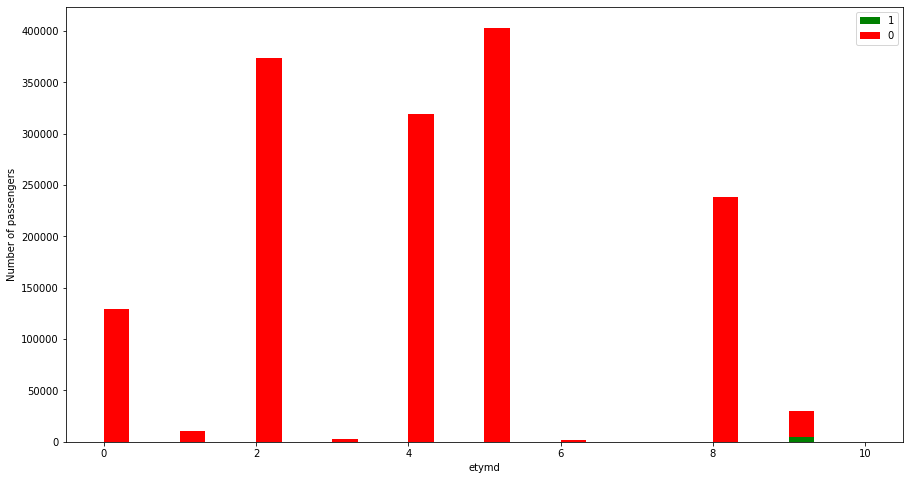

In [18]:
figure = plt.figure(figsize=(15,8))
plt.hist([df_1[df_1['flbmk']==1]['etymd'], df_1[df_1['flbmk']==0]['etymd']], stacked=True, color = ['g','r'],
         bins = 30,label = ['1','0'])
plt.xlabel('etymd')
plt.ylabel('Number of passengers')
plt.legend()

In [19]:
df_1.loc[(df['etymd'] != 9 ) & (df_1['flbmk'].isnull()), 'flbmk'] = 0
df_1.loc[(df['etymd'] == 9 ) & (df_1['flbmk'].isnull()), 'flbmk'] = 1

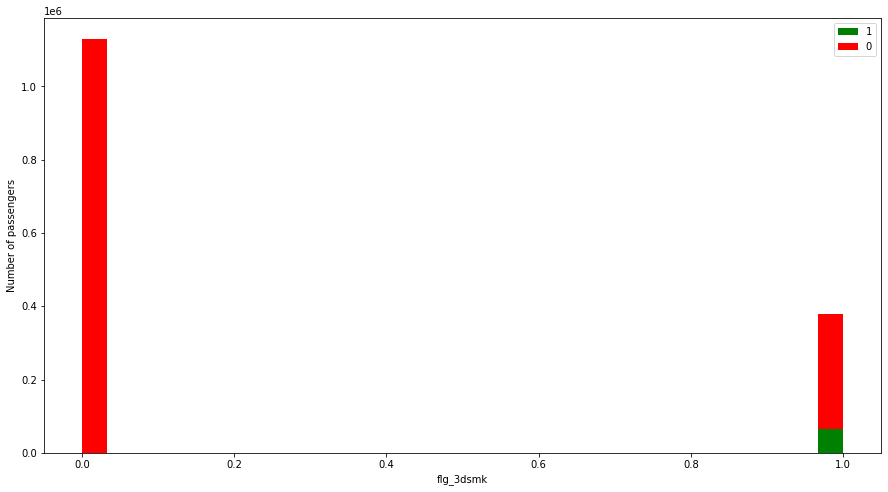

In [20]:
figure = plt.figure(figsize=(15,8))
plt.hist([df_1[df_1['flg_3dsmk']==1]['ecfg'], df_1[df_1['flg_3dsmk']==0]['ecfg']], stacked=True, color = ['g','r'],
         bins = 30,label = ['1','0'])
plt.xlabel('flg_3dsmk')
plt.ylabel('Number of passengers')
plt.legend()

In [21]:
df_1.loc[(df['ecfg'] != 1 ) & (df_1['flg_3dsmk'].isnull()), 'flg_3dsmk'] = 0
df_1.loc[(df['ecfg'] == 1 ) & (df_1['flg_3dsmk'].isnull()), 'flg_3dsmk'] = 1

In [22]:
df_1.isnull().sum()

acqic        0
bacno        0
cano         0
conam        0
contp        0
csmcu        0
ecfg         0
etymd        0
flbmk        0
flg_3dsmk    0
fraud_ind    0
hcefg        0
insfg        0
iterm        0
locdt        0
loctm        0
mcc          0
mchno        0
ovrlt        0
scity        0
stocn        0
stscd        0
txkey        0
dtype: int64

In [23]:
df_1

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,0,0,0.0,0.0,0,5,0,0,33,172652.0,457,59333,0,0,102,0,516056
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,0,0,0,0,9,105114.0,451,0,0,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,0,0,0.0,0.0,0,5,0,0,6,152458.0,457,59333,0,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,0,5,0,0,5,172946.0,247,50436,0,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,0,4,0.0,0.0,0,5,0,0,6,182129.0,263,93775,0,5817,102,0,1051004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,1,8,0.0,0.0,0,6,0,0,4,191642.0,209,38222,0,5817,102,0,1478280
1521783,3226,145107,116252,435.32,5,75,1,8,0.0,0.0,0,6,0,0,13,102338.0,192,90135,0,1458,102,0,661087
1521784,6769,162168,93598,1.38,5,75,1,8,0.0,0.0,0,6,0,0,29,234618.0,373,79246,0,5817,102,0,167073
1521785,6032,45406,197460,1.38,5,75,1,2,0.0,0.0,0,6,0,0,24,215218.0,373,79246,0,5817,102,0,338215


In [31]:
df_1['contp'] = df_1['contp'].astype('object')
df_1['etymd'] = df_1['etymd'].astype('object')
df_1['hcefg'] = df_1['hcefg'].astype('object')
df_1['stscd'] = df_1['stscd'].astype('object')

In [36]:
# 將文字資料轉onehotencode
df_contp = pd.get_dummies(df_1[['contp']])
df_etymd = pd.get_dummies(df_1[['etymd']])
df_hcefg = pd.get_dummies(df_1[['hcefg']])
df_stscd = pd.get_dummies(df_1[['stscd']])
df_2 = pd.concat([df_1,df_contp,df_etymd,df_hcefg,df_stscd,], axis=1, join='inner')
df_2

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey,contp_0.0,contp_1.0,contp_2.0,contp_3.0,contp_4.0,contp_5.0,contp_6.0,etymd_0,etymd_1,etymd_2,etymd_3,etymd_4,etymd_5,etymd_6,etymd_7,etymd_8,etymd_9,etymd_10,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4
0,6881,113261,38038,513.80,5,0,0,0,0.0,0.0,0,5,0,0,33,172652.0,457,59333,0,0,102,0,516056,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,134508,45725,465.62,5,0,0,2,0.0,0.0,0,0,0,0,9,105114.0,451,0,0,5817,102,0,4376,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,6881,15408,188328,513.80,5,0,0,0,0.0,0.0,0,5,0,0,6,152458.0,457,59333,0,0,102,0,483434,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,6716,157159,29967,1016.11,5,62,0,5,0.0,0.0,0,5,0,0,5,172946.0,247,50436,0,3281,102,0,1407164,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5975,105985,81305,713.66,5,62,0,4,0.0,0.0,0,5,0,0,6,182129.0,263,93775,0,5817,102,0,1051004,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,5,75,1,8,0.0,0.0,0,6,0,0,4,191642.0,209,38222,0,5817,102,0,1478280,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1521783,3226,145107,116252,435.32,5,75,1,8,0.0,0.0,0,6,0,0,13,102338.0,192,90135,0,1458,102,0,661087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1521784,6769,162168,93598,1.38,5,75,1,8,0.0,0.0,0,6,0,0,29,234618.0,373,79246,0,5817,102,0,167073,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1521785,6032,45406,197460,1.38,5,75,1,2,0.0,0.0,0,6,0,0,24,215218.0,373,79246,0,5817,102,0,338215,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [40]:
df_2 = df_2.drop(['contp','etymd','hcefg','stscd','fraud_ind'], axis = 1)
df_2

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,txkey,contp_0.0,contp_1.0,contp_2.0,contp_3.0,contp_4.0,contp_5.0,contp_6.0,etymd_0,etymd_1,etymd_2,etymd_3,etymd_4,etymd_5,etymd_6,etymd_7,etymd_8,etymd_9,etymd_10,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4
0,6881,113261,38038,513.80,0,0,0.0,0.0,0,0,33,172652.0,457,59333,0,0,102,516056,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,134508,45725,465.62,0,0,0.0,0.0,0,0,9,105114.0,451,0,0,5817,102,4376,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,6881,15408,188328,513.80,0,0,0.0,0.0,0,0,6,152458.0,457,59333,0,0,102,483434,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,6716,157159,29967,1016.11,62,0,0.0,0.0,0,0,5,172946.0,247,50436,0,3281,102,1407164,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5975,105985,81305,713.66,62,0,0.0,0.0,0,0,6,182129.0,263,93775,0,5817,102,1051004,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,75,1,0.0,0.0,0,0,4,191642.0,209,38222,0,5817,102,1478280,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1521783,3226,145107,116252,435.32,75,1,0.0,0.0,0,0,13,102338.0,192,90135,0,1458,102,661087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1521784,6769,162168,93598,1.38,75,1,0.0,0.0,0,0,29,234618.0,373,79246,0,5817,102,167073,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1521785,6032,45406,197460,1.38,75,1,0.0,0.0,0,0,24,215218.0,373,79246,0,5817,102,338215,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [41]:
df_3 = pd.concat([df_2,df['fraud_ind']], axis=1, join='inner')
df_3

,acqic,bacno,cano,conam,csmcu,ecfg,flbmk,flg_3dsmk,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,txkey,contp_0.0,contp_1.0,contp_2.0,contp_3.0,contp_4.0,contp_5.0,contp_6.0,etymd_0,etymd_1,etymd_2,etymd_3,etymd_4,etymd_5,etymd_6,etymd_7,etymd_8,etymd_9,etymd_10,hcefg_0,hcefg_1,hcefg_2,hcefg_3,hcefg_5,hcefg_6,hcefg_7,hcefg_8,hcefg_9,stscd_0,stscd_1,stscd_2,stscd_3,stscd_4,fraud_ind
0,6881,113261,38038,513.80,0,0,0.0,0.0,0,0,33,172652.0,457,59333,0,0,102,516056,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,134508,45725,465.62,0,0,0.0,0.0,0,0,9,105114.0,451,0,0,5817,102,4376,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,6881,15408,188328,513.80,0,0,0.0,0.0,0,0,6,152458.0,457,59333,0,0,102,483434,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,6716,157159,29967,1016.11,62,0,0.0,0.0,0,0,5,172946.0,247,50436,0,3281,102,1407164,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,5975,105985,81305,713.66,62,0,0.0,0.0,0,0,6,182129.0,263,93775,0,5817,102,1051004,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521782,6322,91008,15189,578.38,75,1,0.0,0.0,0,0,4,191642.0,209,38222,0,5817,102,1478280,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1521783,3226,145107,116252,435.32,75,1,0.0,0.0,0,0,13,102338.0,192,90135,0,1458,102,661087,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1521784,6769,162168,93598,1.38,75,1,0.0,0.0,0,0,29,234618.0,373,79246,0,5817,102,167073,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1521785,6032,45406,197460,1.38,75,1,0.0,0.0,0,0,24,215218.0,373,79246,0,5817,102,338215,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
